<img src="https://insta.ufpr.br/portal/wp-content/uploads/2020/09/Ativo-1-8.png" width="200"/>

# *INSTA Super case*


---


Case de distribuição de e-commerce

# **Verifica a versão do Python e importa as bibliotecas básicas**

In [61]:
# check Python version
!python -V

import pandas as pd # download library to read data into dataframe
#pd.set_option('display.max_columns', None)
import numpy as np # import numpy library
import matplotlib.pyplot as plt # plots
import collections
import random # library for random number generation

from google.colab import files
import io
#import csv


Python 3.7.10


#Importar Arquivo de dados

Inclua um CSV com os dados a serem analisados
 * Incluindo cabeçalho
 * Separação de campos delimitado por *,*
 * Separação de linha usando *nova linha*

 O arquivo tem mais de 6000 registros, pode levar alguns segundos.

In [62]:
# Agradeço ao Rafael Fix por esta parte do código

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

csvString = io.StringIO(uploaded[fn].decode('utf-8'))

print(csvString)

starsData = pd.read_csv(csvString)

print("Data read into dataframe!") # takes about 30 seconds
starsData.head()

Saving SuperCase_data_6000_3.csv to SuperCase_data_6000_3 (5).csv
User uploaded file "SuperCase_data_6000_3.csv" with length 388945 bytes
Data read into dataframe!


,Stars,Product,Origin,CD_name,Dest,DistanceTravelled_Fac_CD,TruckType,DriverF_CD,DaysStocked,FloorCD,DistanceTravelled_CD_Client,TruckType2,DriverCD_C,RoutDeliveryOrder
0,4.0,P6,F4,CD2,C203,162,SemiTrailler,D05,37,2,59.7,CityDeliveryTruck,D2_2,2
1,1.0,P2,F3,CD2,C202,162,SemiTrailler,D06,5,0,94.2,MiniVan,D2_4,3
2,5.0,P6,F3,CD2,C202,162,SemiTrailler,D04,27,0,30.9,Van,D2_7,1
3,2.0,P9,F3,CD2,C202,162,SemiTrailler,D03,14,0,89.7,Van,D2_7,3
4,5.0,P9,F2,CD3,C305,58,Truck,D03,30,1,171.7,Van,D3_2,6


# Padronização do DataTable


## Renomear a primeira coluna para "stars"

Para se adequar ao código

In [63]:
# fix name of the column displaying the Stars
column_names = starsData.columns.values
print(starsData.columns.values)
column_names[0] = "stars"
starsData.columns = column_names
print(column_names)


['Stars' 'Product' 'Origin' 'CD_name' 'Dest' 'DistanceTravelled_Fac_CD'
 'TruckType' 'DriverF_CD' 'DaysStocked' 'FloorCD'
 'DistanceTravelled_CD_Client' 'TruckType2' 'DriverCD_C'
 'RoutDeliveryOrder']
['stars' 'Product' 'Origin' 'CD_name' 'Dest' 'DistanceTravelled_Fac_CD'
 'TruckType' 'DriverF_CD' 'DaysStocked' 'FloorCD'
 'DistanceTravelled_CD_Client' 'TruckType2' 'DriverCD_C'
 'RoutDeliveryOrder']


# Verificando os dados

## Em um contexto real, deveríamos verificar cada coluna minuciosamente procurando por valores fora dos padrões. Mas aqui vamos "verificar" somente a coluna "stars"

### Exemplos mais comuns de valores fora dos padrões são: 

* Valores numéricos fora do intervalo, por exemplo quantidades de estrelas igual a 15, quando devia ser de 1 a 5.
* Texto no local de valores numéricos
* Valores "nan" Not a Number
* Para valores de categorias, no nosso exemplo os produtos são P1, P2, P3; Caso apareca um "Produto 1" precisa ser uniformizado


3.0360038923126824
[(1.0, 1154), (2.0, 1180), (3.0, 1372), (4.0, 1236), (5.0, 1198), (6.0, 26), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1)]


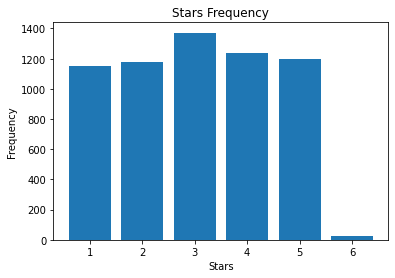

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [64]:
starsData["stars"].value_counts() # frequency table

print(starsData["stars"].mean())

c = collections.Counter(starsData["stars"])
c = sorted(c.items())
print(c)

stars_num = [i[0] for i in c]
freq = [i[1] for i in c]

f, ax = plt.subplots()

plt.bar(stars_num, freq)

plt.title("Stars Frequency")
plt.xlabel("Stars")
plt.ylabel("Frequency")
#ax.set_xticks(range(1, 8))

plt.show()

print(stars_num)

# Existem dados fora do intevalo de estrelas [1,5] , alguns valores são 6 outros são NAN

##Limpar dados de estrelas fora do intervalo [1,5], excluindo os registros

3.0234527687296415
[(1.0, 1154), (2.0, 1180), (3.0, 1372), (4.0, 1236), (5.0, 1198)]


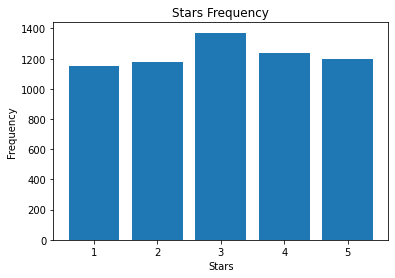

[1.0, 2.0, 3.0, 4.0, 5.0]


In [65]:
starsData = starsData[starsData["stars"] <= 5]
starsData = starsData[starsData["stars"] >= 1]

starsData = starsData[starsData["FloorCD"] <= 4] # aproveitei e padronizei outros dados numéricos também
starsData = starsData[starsData["FloorCD"] >= 0]

starsData = starsData[starsData["RoutDeliveryOrder"] <= 6]
starsData = starsData[starsData["RoutDeliveryOrder"] >= 1]

starsData["stars"].value_counts() # frequency table

print(starsData["stars"].mean())

c = collections.Counter(starsData["stars"])
c = sorted(c.items())
print(c)

stars_num = [i[0] for i in c]
freq = [i[1] for i in c]

f, ax = plt.subplots()

plt.bar(stars_num, freq)

plt.title("Stars Frequency")
plt.xlabel("Stars")
plt.ylabel("Frequency")

plt.show()

print(stars_num)

starsData = starsData.reset_index(drop=True) # É importante refazer o indice do dataFrame, apeos excluir linhas, pois pode gerar problema no SciKit Learn


#Outras inconsistências nos dados

### Note a coluna Driver_F_CD, ela só tem os valores "D01" ... "D06" mas não sabemos se o motorista D01 pode trabalhar no CD1, CD2 ou CD3 ? Isso não te parece no mínimo esquisito ?

### Fica como Lição de casa você pensar em uma alternativa


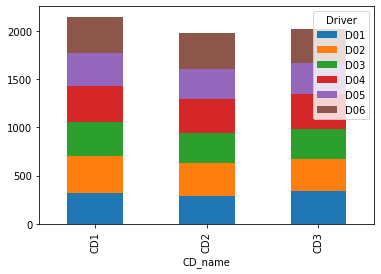

DriverF_CD  D01  D02  D03  D04  D05  D06
CD_name                                 
CD1         316  388  352  376  342  372
CD2         294  338  310  350  310  372
CD3         344  330  312  360  324  350


In [66]:
ct = pd.crosstab(index=starsData['CD_name'], columns=starsData['DriverF_CD'])

ct.plot.bar(stacked=True)
plt.legend(title='Driver')

plt.show()

print(ct)


# Começando a análise

## Importar as bibliotecas: 
* SKLEARN
* graphviz
* matplotlib


In [67]:
# import decision trees scikit-learn libraries
%matplotlib inline
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix # Não usaremos essas métricas neste exemplo

import matplotlib.pyplot as plt

#!conda install python-graphviz --yes
import graphviz

from sklearn.tree import export_graphviz

import itertools

# Separar o dataFrame em variáveis dependentes e independentes

In [68]:
# split the DataFrame
stars = starsData["stars"] # Só a coluna "stars"
stars_class = stars[:]
variables = starsData.iloc[:,1:] # Todas as outras colunas com excessão da "stars"

# Deixe essa parte do código comentado poor enquanto

# stars_class.loc[stars <= 2] = "bad"
# stars_class.loc[stars == 3] = "average"
# stars_class.loc[stars >= 4] = "good"

stars_class.head()

0    good
1     bad
2    good
3     bad
4    good
Name: stars, dtype: object

In [69]:
variables.head()

,Product,Origin,CD_name,Dest,DistanceTravelled_Fac_CD,TruckType,DriverF_CD,DaysStocked,FloorCD,DistanceTravelled_CD_Client,TruckType2,DriverCD_C,RoutDeliveryOrder
0,P6,F4,CD2,C203,162,SemiTrailler,D05,37,2,59.7,CityDeliveryTruck,D2_2,2
1,P2,F3,CD2,C202,162,SemiTrailler,D06,5,0,94.2,MiniVan,D2_4,3
2,P6,F3,CD2,C202,162,SemiTrailler,D04,27,0,30.9,Van,D2_7,1
3,P9,F3,CD2,C202,162,SemiTrailler,D03,14,0,89.7,Van,D2_7,3
4,P9,F2,CD3,C305,58,Truck,D03,30,1,171.7,Van,D3_2,6


# Adequação das variáveis categóricas em colunas binárias - OneHotEncoder




In [70]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse= False)

prod_encoded = pd.DataFrame (enc.fit_transform(variables[['Product']])).astype(int)
prod_encoded.columns = enc.get_feature_names(['Product'])

origin_encoded = pd.DataFrame (enc.fit_transform(variables[['Origin']])).astype(int)
origin_encoded.columns = enc.get_feature_names(['Origin'])

CD_encoded = pd.DataFrame (enc.fit_transform(variables[['CD_name']])).astype(int)
CD_encoded.columns = enc.get_feature_names(['CD_name'])

Destination_encoded = pd.DataFrame (enc.fit_transform(variables[['Dest']])).astype(int)
Destination_encoded.columns = enc.get_feature_names(['Dest'])

TruckType_encoded = pd.DataFrame (enc.fit_transform(variables[['TruckType']])).astype(int)
TruckType_encoded.columns = enc.get_feature_names(['TruckType'])

FloorCD_encoded = pd.DataFrame (enc.fit_transform(variables[['FloorCD']])).astype(int)
FloorCD_encoded.columns = enc.get_feature_names(['FloorCD'])

TruckType2_encoded = pd.DataFrame (enc.fit_transform(variables[['TruckType2']])).astype(int)
TruckType2_encoded.columns = enc.get_feature_names(['TruckType2'])

DriverCD_C_encoded = pd.DataFrame (enc.fit_transform(variables[['DriverCD_C']])).astype(int)
DriverCD_C_encoded.columns = enc.get_feature_names(['DriverCD_C'])

var1 = pd.concat([prod_encoded, origin_encoded, CD_encoded, Destination_encoded, TruckType_encoded, FloorCD_encoded, TruckType2_encoded, DriverCD_C_encoded, variables["RoutDeliveryOrder"]], axis=1)

var1.head()




,Product_P1,Product_P10,Product_P11,Product_P12,Product_P13,Product_P14,Product_P15,Product_P2,Product_P3,Product_P4,Product_P5,Product_P6,Product_P7,Product_P8,Product_P9,Origin_F1,Origin_F2,Origin_F3,Origin_F4,CD_name_CD1,CD_name_CD2,CD_name_CD3,Dest_C101,Dest_C102,Dest_C103,Dest_C104,Dest_C105,Dest_C201,Dest_C202,Dest_C203,Dest_C204,Dest_C205,Dest_C301,Dest_C302,Dest_C303,Dest_C304,Dest_C305,TruckType_SemiTrailler,TruckType_Truck,FloorCD_0,FloorCD_1,FloorCD_2,FloorCD_3,FloorCD_4,TruckType2_CityDeliveryTruck,TruckType2_MiniVan,TruckType2_Van,DriverCD_C_D1_1,DriverCD_C_D1_2,DriverCD_C_D1_3,DriverCD_C_D1_4,DriverCD_C_D1_5,DriverCD_C_D1_6,DriverCD_C_D1_7,DriverCD_C_D2_1,DriverCD_C_D2_2,DriverCD_C_D2_3,DriverCD_C_D2_4,DriverCD_C_D2_5,DriverCD_C_D2_6,DriverCD_C_D2_7,DriverCD_C_D3_1,DriverCD_C_D3_2,DriverCD_C_D3_3,DriverCD_C_D3_4,DriverCD_C_D3_5,DriverCD_C_D3_6,DriverCD_C_D3_7,RoutDeliveryOrder
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6


## DecisionTreeClassifier e os seus Parâmetros

O algoritimo do DecisionTreeClassifier tem a tendência natural de fazer um OVERFITING, para ajustar isso modificamos os parâmetros:

* max_depth : Profundidade máxima da árvore
* min_samples_split : quantidade mínima de amostras para se dividir um nó
* min_samples_leaf : Quantidade mínima de amostras em um nó folha (nó da base da árvore)

In [71]:
delivery_tree = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split = 2, min_samples_leaf = 1)
delivery_tree.fit(var1, stars_class)

print("Decision tree model saved to delivery_tree!")
print(delivery_tree)
print(var1.columns.values)

Decision tree model saved to delivery_tree!
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
['Product_P1' 'Product_P10' 'Product_P11' 'Product_P12' 'Product_P13'
 'Product_P14' 'Product_P15' 'Product_P2' 'Product_P3' 'Product_P4'
 'Product_P5' 'Product_P6' 'Product_P7' 'Product_P8' 'Product_P9'
 'Origin_F1' 'Origin_F2' 'Origin_F3' 'Origin_F4' 'CD_name_CD1'
 'CD_name_CD2' 'CD_name_CD3' 'Dest_C101' 'Dest_C102' 'Dest_C103'
 'Dest_C104' 'Dest_C105' 'Dest_C201' 'Dest_C202' 'Dest_C203' 'Dest_C204'
 'Dest_C205' 'Dest_C301' 'Dest_C302' 'Dest_C303' 'Dest_C304' 'Dest_C305'
 'TruckType_SemiTrailler' 'TruckType_Truck' 'FloorCD_0

# Resultados em formato gráfico são sempre melhores ;)

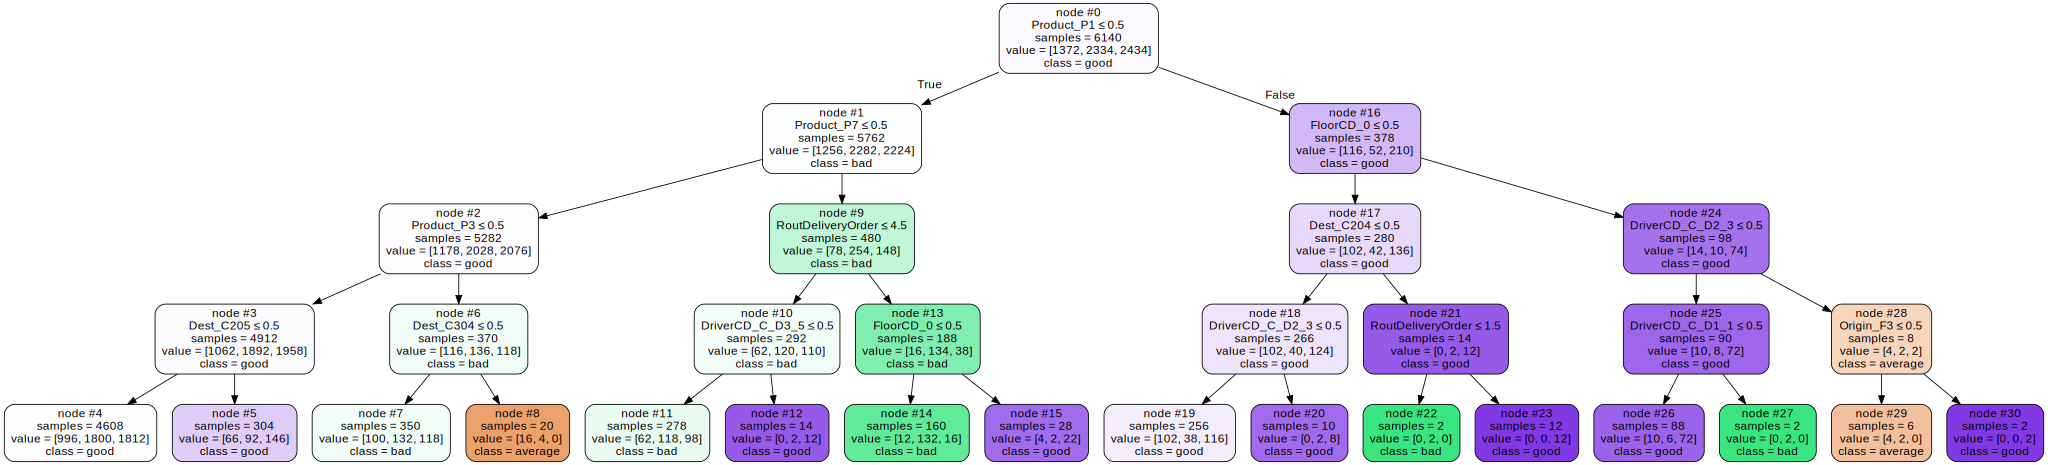

In [72]:
export_graphviz(delivery_tree,
                feature_names=list(var1.columns.values),
                out_file="delivery_tree.dot",
                class_names=np.unique(stars_class.astype(str)),
                filled=True,
                rounded=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel = False)

with open("delivery_tree.dot") as delivery_tree_image:
    delivery_tree_graph = delivery_tree_image.read()
graphviz.Source(delivery_tree_graph)

# *Brinque um pouco com os parâmetros modificando-os para ver o que acontece!*


### Obrigado por concluir o SUPER CASE!

## Autor

<a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pecora</a>

## Log de modificações

| Data | Versão | Modificado por | Descrição |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 04-04-2021       | 1.0     | Eduardo Pecora    | Documentação               |

<hr>

## <h3 align="center"> (c) INSTA/ UFPR 2021. All rights reserved. <h3/>

